In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import contextily as ctx

In [10]:
# Import perimeters

eaton_boundary = gpd.read_file('data/Eaton_Perimeter/Eaton_Perimeter_20250121.shp')
palisades_boundary = gpd.read_file('data/Palisades_Perimeter/Palisades_Perimeter_20250121.shp')

In [11]:
# Join perimeters together
fires = gpd.GeoDataFrame(pd.concat([eaton_boundary, palisades_boundary]))

In [12]:
# Import CA EJI gdb
fp = os.path.join("data", "EJI_2024_California", "EJI_2024_California.gdb")
eji_california = gpd.read_file(fp)

# 1. Metadata exploration

Review the CSV with the metadata information for the EJI data.

Look at the variables and with your team select a few variables that, in your opinion, could influence a community’s response to a wildfire. You’ll be working with some of them in the following exercises.



Choosing 200% below poverty level and percentage of housing that is rented

# 2. Polygon intersection

Open the fire perimeters and the EJI data and do initial data exploration.

Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a geopandas.GeoDataFrame that will have only have the census tracts intersecting the Palisades fire perimeter.

Create an exploratory map showing
     the census tracts that intersect the Palisades fire perimeter and
     the Palisades fire perimeter.

Create the corresponding geopandas.GeoDataFrame and exploratory map for the Eaton fire.

In [14]:
eji_california = eji_california.to_crs(palisades_boundary.crs)

eji_palisades = gpd.sjoin(eji_california, palisades_boundary, predicate = 'intersects')

<Axes: >

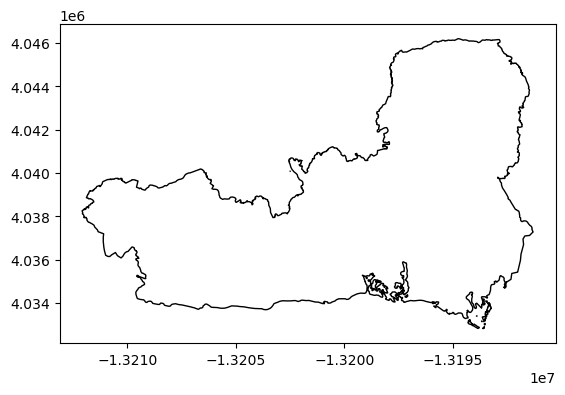

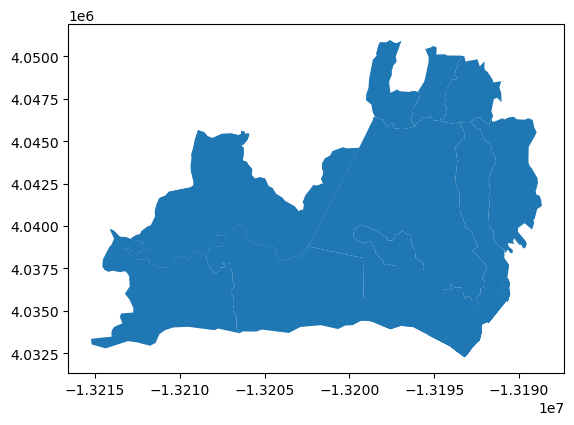

In [15]:
fig, ax = plt.subplots()

eji_palisades.plot()
palisades_boundary.plot(ax=ax,
                       color='none',
                       edgecolor='black')

In [17]:
eji_california = eji_california.to_crs(eaton_boundary.crs)

eji_eaton = gpd.sjoin(eji_california, eaton_boundary, predicate = 'intersects')

<Axes: >

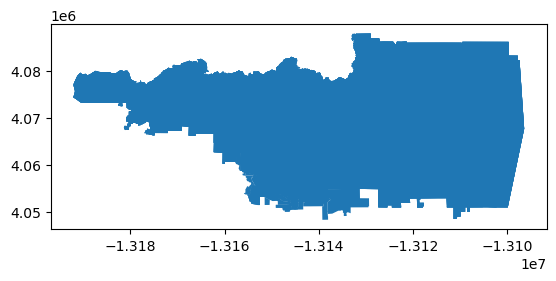

In [18]:
fig, ax = plt.subplots()

eji_eaton.plot(ax=ax)
eaton_boundary.plot(ax=ax)

# 3. Polygon clipping


Clip the census tracts to the Palisades fire perimeter using geopandas.clip().

Do the same for the Eaton fire perimeter.

Quickly visualize your data.


In [19]:
eji_palisades_clipped = gpd.clip(eji_california, palisades_boundary)

<Axes: >

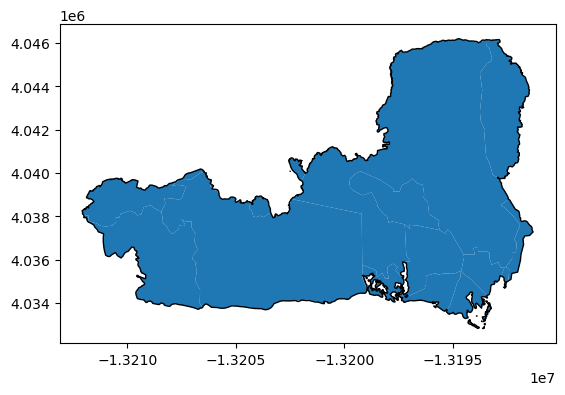

In [20]:
fig, ax = plt.subplots()

eji_palisades_clipped.plot(ax=ax)

palisades_boundary.plot(ax=ax,
                       color='none',
                       edgecolor='black')

In [21]:
eji_eaton_clipped = gpd.clip(eji_california, eaton_boundary)

<Axes: >

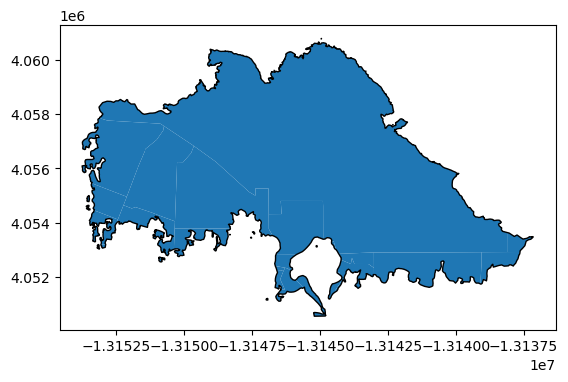

In [22]:
fig, ax = plt.subplots()

eji_eaton_clipped.plot(ax=ax)

eaton_boundary.plot(ax=ax,
                       color='none',
                       edgecolor='black')

# 4. Visualize fire perimeters with a basemap

To add a basemap to our plot we will be using the contextily library.

Import the contextily library at the top of your notebook as ctx. This library is already installed in the EDS 220 environment.

Use and update the code below to plot the fire perimeters adding a basemap

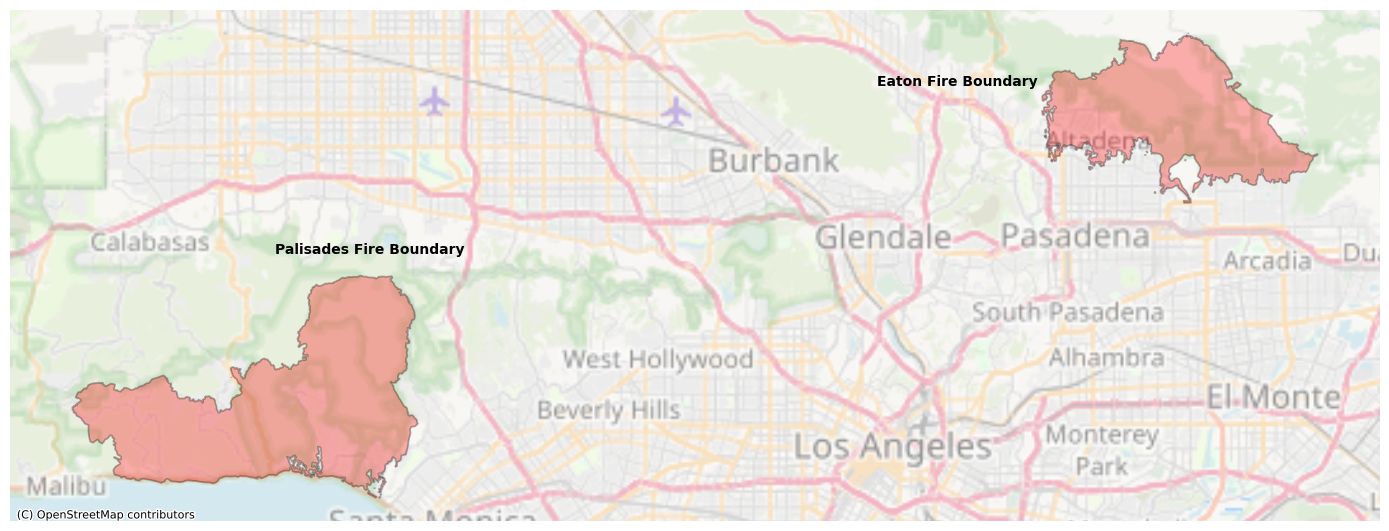

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR

palisades_boundary.plot(ax=ax,
                       edgecolor = 'black',
                       color='red',
                       linewidth=1.25,
                       alpha=0.3)
eaton_boundary.plot(ax=ax,
                   edgecolor = 'black',
                   color='red',
                   linewidth=1.25,
                   alpha=0.3)

# ADD LEGEND OR ANNOTATION TO IDENTIFY EACH FIRE
plt.figtext(x = .63,
            y = .65,
            s ="Eaton Fire Boundary",
            weight = 'bold')
plt.figtext(x = .2,
            y = .51,
            s ="Palisades Fire Boundary",
            weight = 'bold'
            )


# Add basemap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha = 0.5)

# ADD TITLE

ax.axis('off')

plt.tight_layout()
plt.show()

# 5. Visualize EJI data
Use and update the code below to plot one of the variables you and your team explored in step 1 as being relevant to a community’s response to a wildfire.

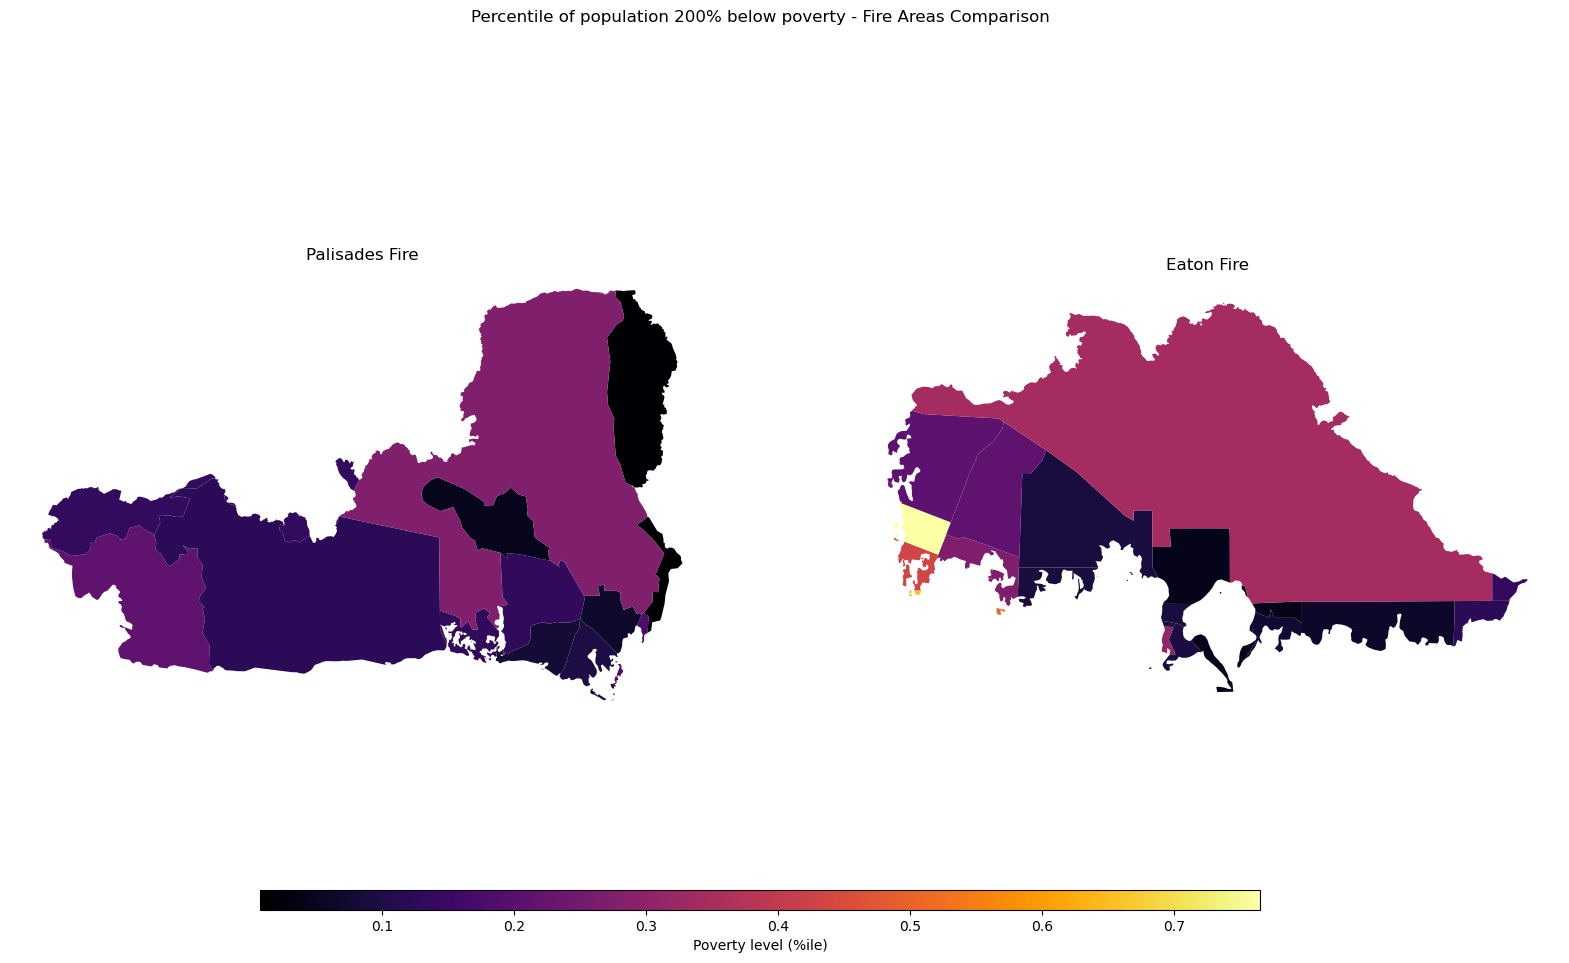

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'EPL_POV200'

# Find common min/max for legend range
vmin = min(eji_palisades_clipped[eji_variable].min(), eji_eaton_clipped[eji_variable].min())
vmax = max(eji_palisades_clipped[eji_variable].max(), eji_eaton_clipped[eji_variable].max())

# Plot census tracts within Palisades perimeter
eji_palisades_clipped.plot(
    column= eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax1,
    cmap = 'inferno'
)
ax1.set_title('Palisades Fire')
ax1.axis('off')

# Plot census tracts within Eaton perimeter
eji_eaton_clipped.plot(
    column=eji_variable,
    vmin=vmin, vmax=vmax,
    legend=False,
    ax=ax2,
    cmap = 'inferno'
)
ax2.set_title('Eaton Fire')
ax2.axis('off')

# Add overall title
fig.suptitle('Percentile of population 200% below poverty - Fire Areas Comparison')

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable( norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap = 'inferno')
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Poverty level (%ile)')

plt.show()